# Isolation Forest

## Load Data

In [1]:
## Libraries
# lightkurve
#import lightkurve as lk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels.api as sm
# import warnings
# import pickle
from sklearn.ensemble import IsolationForest
# from sklearn.preprocessing import StandardScaler

In [3]:
##("../0.Data/031381302_imputed.csv")

## Data
df = pd.read_csv("../0.Data/031381302_imputed.csv", index_col = 0)
df.sort_index(inplace=True)

# Check
print(df.shape)
print(df.head())

## Time Series of interest
lightcurve = df.loc[:, ["pdcsap_clean"]]

# Check
print(lightcurve.shape); lightcurve.info(); lightcurve.head()

(18856, 4)
             pdcsap_flux  pdcsap_clean        trend  seasonal
1437.978646          NaN      1.423914  1564.788866 -1.753096
1437.980034          NaN     -1.225973  1564.784308  0.901349
1437.981423          NaN      1.204118  1564.779761 -1.524195
1437.982812          NaN      2.528983  1564.775225 -2.844523
1437.984201          NaN      0.485369  1564.770699 -0.796384
(18856, 1)
<class 'pandas.core.frame.DataFrame'>
Float64Index: 18856 entries, 1437.978645522663 to 1464.2854684532865
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pdcsap_clean  18856 non-null  float64
dtypes: float64(1)
memory usage: 294.6 KB


,pdcsap_clean
1437.978646,1.423914
1437.980034,-1.225973
1437.981423,1.204118
1437.982812,2.528983
1437.984201,0.485369


## Model Setup

In [12]:
## Hyperparameters
n_estimators = 100 # Number of trees
contamination = 0.001 # Expected proportion of anomalies
sample_size = 256 # Number of samples used to train each tree

## Train Model

In [13]:
## Isolation Forest
model = IsolationForest(n_estimators = n_estimators, contamination = contamination, max_samples = sample_size)
#contamination = "auto", random_state = 42)
# random_state: for reproducibility.
model.fit(lightcurve)

## Predict anomalies
anomalies = model.predict(lightcurve)
scores = model.decision_function(lightcurve)

## Save
lightcurve["anomaly"] = anomalies
lightcurve["anomaly"] = lightcurve["anomaly"].map({1: 0, -1: 1})
lightcurve["anomaly_score"] = scores

C:\Users\alexd\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [30]:
# Check
print(lightcurve["anomaly_score"].describe())

lightcurve.head()

count    18856.000000
mean         0.360435
std          0.076844
min         -0.004400
25%          0.330152
50%          0.393710
75%          0.410225
max          0.425459
Name: anomaly_score, dtype: float64


,pdcsap_clean,anomaly,anomaly_score
1437.978646,1.423914,0,0.415028
1437.980034,-1.225973,0,0.408411
1437.981423,1.204118,0,0.418594
1437.982812,2.528983,0,0.406531
1437.984201,0.485369,0,0.408948


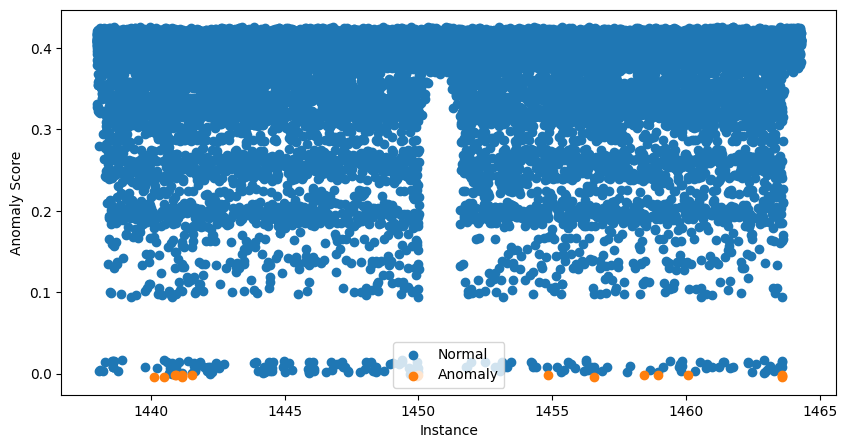

In [17]:
## Plot - Anomaly Scores
plt.figure(figsize=(10, 5))

# Plot normal instances
normal = lightcurve[lightcurve['anomaly'] == 0]
plt.scatter(normal.index, normal['anomaly_score'], label='Normal')

# Plot anomalies
anomalies = lightcurve[lightcurve['anomaly'] == 1]
plt.scatter(anomalies.index, anomalies['anomaly_score'], label='Anomaly')
plt.xlabel("Instance")
plt.ylabel("Anomaly Score")
plt.legend()
plt.show()

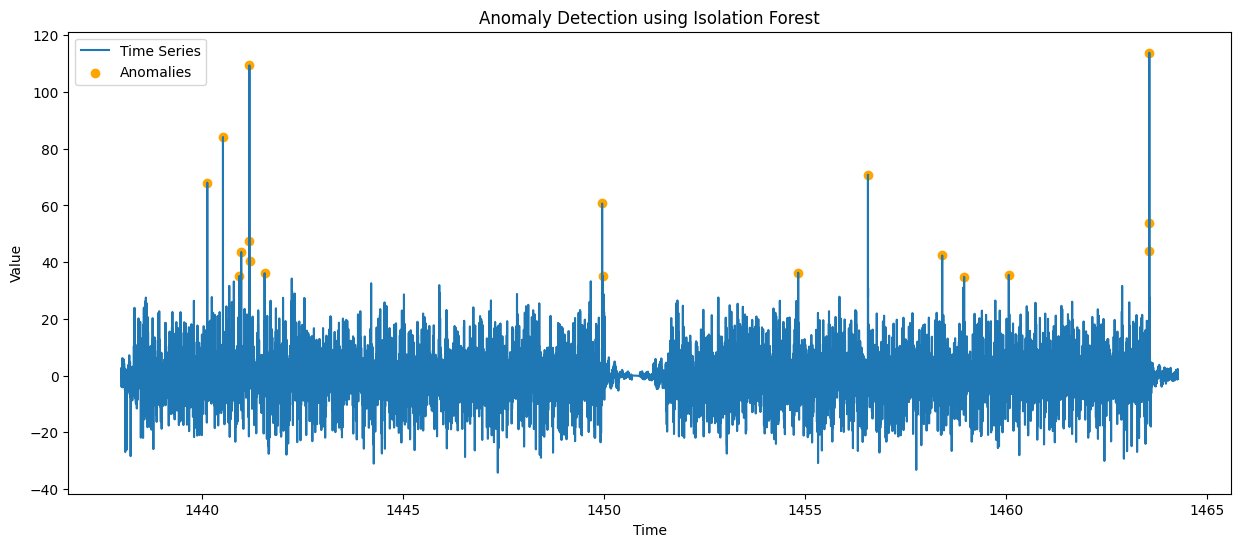

In [20]:
## Plot - Highlight anomalies
plt.figure(figsize=(15, 6))
plt.plot(lightcurve["pdcsap_clean"], label='Time Series')
plt.scatter(anomalies.index, anomalies['pdcsap_clean'], label='Anomalies', color = "orange")
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

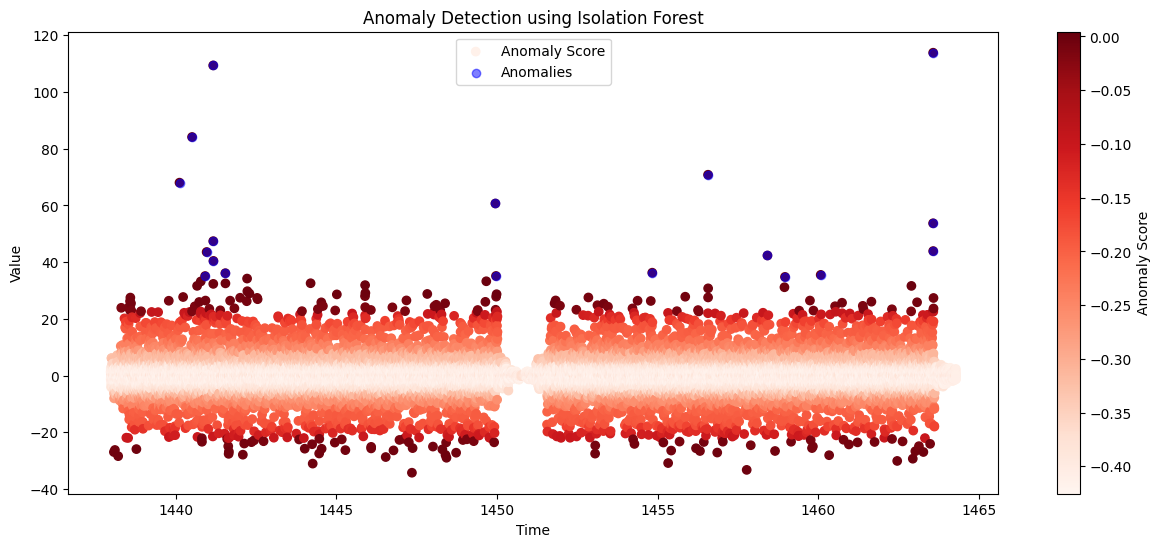

In [28]:
## Plot - Anomaly scores
plt.figure(figsize=(15, 6))
plt.scatter(lightcurve.index, lightcurve["pdcsap_clean"], c = -lightcurve["anomaly_score"], cmap = "Reds", label='Anomaly Score')
plt.colorbar().set_label("Anomaly Score")
plt.scatter(anomalies.index, anomalies['pdcsap_clean'], label='Anomalies', color = "blue", alpha = 0.5)
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

## Exploration

In [ ]:
## Anomaly Score Percentile Intervals
# Convert anomaly scores to positive values
positive_scores = -scores

# Calculate 95% credible intervals
lower_bound = np.percentile(positive_scores, 2.5)
upper_bound = np.percentile(positive_scores, 97.5)

# Add to DataFrame
data = data.iloc[-len(deseasonalized):]
data['deseasonalized'] = deseasonalized
data['anomaly_score'] = positive_scores
data['anomaly'] = np.where(anomalies == -1, 1, 0)
data['lower_bound'] = lower_bound
data['upper_bound'] = upper_bound